<p><img alt="Colaboratory logo" height="240px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Logo_EAFIT.svg/2560px-Logo_EAFIT.svg.png" align="center" hspace="350px" vspace="0px"></p>

# **<center> Cruces del shapefile con objetos geográfico de tipo linestring</center>**



<center>


*Jeferson Stiven Arboleda Colorado* \\


</center>

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 86.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin

Cargamos nuestros datos

In [5]:
mede_shp = gpd.read_file('/content/drive/MyDrive/Maestria_eafit/shapes_creados/api_cols/casos_hurtos_5.shp')
mede_shp.head()

,OBJECTID,CODIGO,COMUNA,BARRIO,NOMBRE_BAR,SECTOR,INDICADOR_,NOMBRE_COM,SHAPE__Are,SHAPE__Len,...,tiendas_va,supermerca,casinos,hoteles_ho,iglesias,tiendas_ro,centros_ma,entreten_n,centro_med,geometry
0,6754,1305,13,05,Metropolitano,4,U,SAN JAVIER,101866.863770,1537.700241,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"POLYGON ((-75.60795 6.26491, -75.60781 6.26482..."
1,6755,0701,07,01,Universidad Nacional,2,U,ROBLEDO,490437.147949,2838.152470,...,11.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0,"POLYGON ((-75.57688 6.26663, -75.57672 6.26666..."
2,6756,0510,05,10,Tricentenario,2,U,CASTILLA,421343.229492,2922.008690,...,12.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,"POLYGON ((-75.56621 6.29586, -75.56619 6.29586..."
3,6757,1511,15,11,La Colina,6,U,GUAYABAL,689537.432617,4825.014239,...,54.0,9.0,NaN,4.0,7.0,11.0,5.0,NaN,2.0,"POLYGON ((-75.58774 6.20276, -75.58819 6.20163..."
4,6758,1113,11,13,El Estadio,4,U,LAURELES,365142.314453,2636.136878,...,56.0,5.0,3.0,42.0,10.0,43.0,7.0,2.0,34.0,"POLYGON ((-75.59328 6.26189, -75.59324 6.26188..."


In [6]:
mede_shp.shape

(265, 65)

In [7]:
mede_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Garantizamos el correcto sistema de georreferencia

In [8]:
mede_shp = mede_shp.to_crs("EPSG:6257")


Podemos importar los datos de tipo linestring

In [43]:
cicloruta = gpd.read_file('/content/drive/MyDrive/Maestria_eafit/Shapes/Cicloruta.shp')
cicloruta.head()

,OBJECTID,PROYECTO,SYMBOL,FECHA,PK_CUE,RULEID,SHAPE_LEN,geometry
0,102,NaN,2,NaN,0.0,1,3.112933,"LINESTRING Z (832829.740 1183580.613 1473.910,..."
1,103,NaN,2,NaN,0.0,1,8.790008,"LINESTRING Z (832825.845 1183583.608 1474.092,..."
2,104,NaN,2,NaN,0.0,1,28.829002,"LINESTRING Z (832787.930 1183577.394 1474.320,..."
3,105,NaN,2,NaN,0.0,1,158.629358,"LINESTRING Z (832793.565 1183262.318 1475.305,..."
4,106,NaN,2,NaN,0.0,1,59.501435,"LINESTRING Z (832232.915 1183162.538 1488.268,..."


In [44]:
cicloruta.shape

(552, 8)

<Axes: >

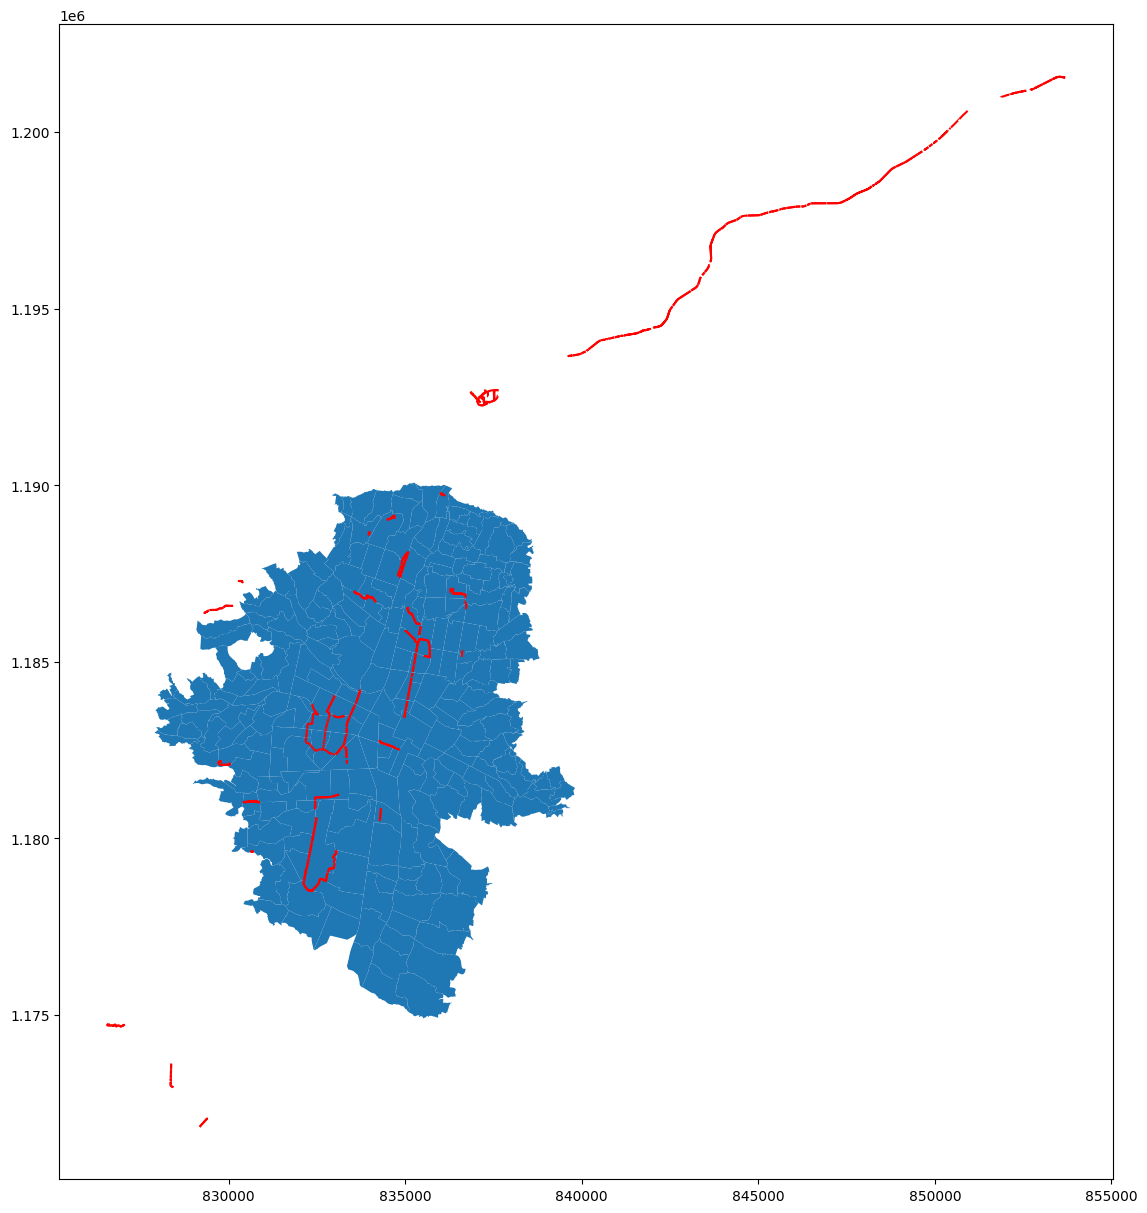

In [45]:
axis = mede_shp.plot(figsize=(20,15))
cicloruta.plot(ax=axis, color='red')


Creamos un buffer

In [46]:
cicloruta['buffer'] = cicloruta.buffer(100)

In [13]:
cicloruta = cicloruta.set_geometry('buffer')

<Axes: >

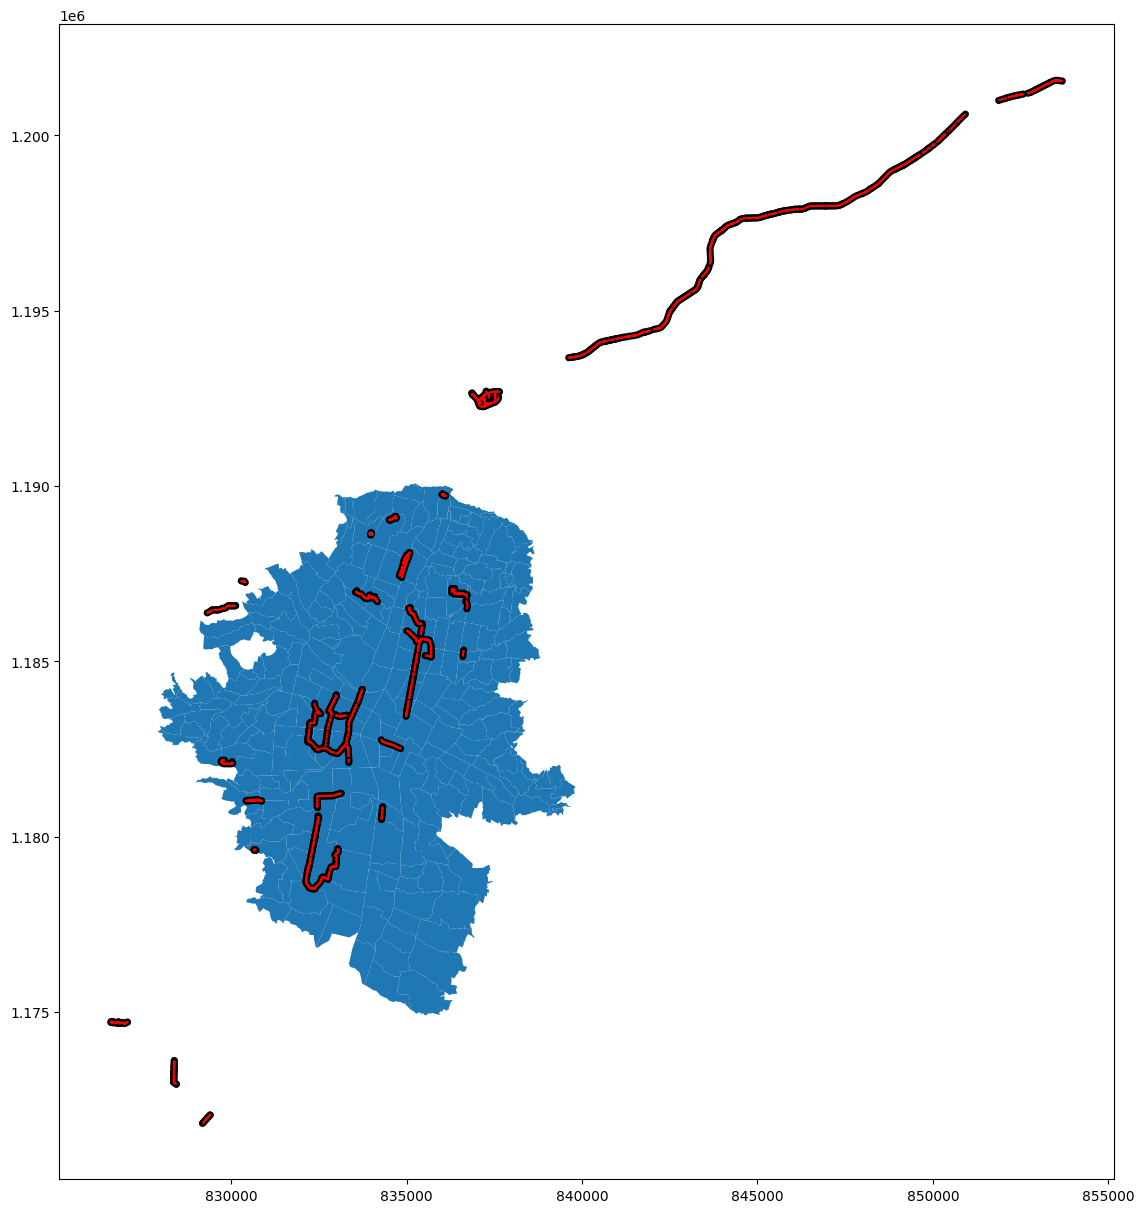

In [48]:
axis = mede_shp.plot(figsize=(20,15))
cicloruta['buffer'].plot(ax=axis, color='black')
cicloruta.plot(ax=axis, color='red');


In [39]:
cicloruta

,OBJECTID,PROYECTO,SYMBOL,FECHA,PK_CUE,RULEID,SHAPE_LEN,geometry,buffer
0,102,NaN,2,NaN,0.0,1,3.112933,"LINESTRING Z (832829.740 1183580.613 1473.910,...","POLYGON ((832788.444 1183489.655, 832786.801 1..."
1,103,NaN,2,NaN,0.0,1,8.790008,"LINESTRING Z (832825.845 1183583.608 1474.092,...","POLYGON ((832789.693 1183490.447, 832788.050 1..."
2,104,NaN,2,NaN,0.0,1,28.829002,"LINESTRING Z (832787.930 1183577.394 1474.320,...","POLYGON ((832786.378 1183678.498, 832790.651 1..."
3,105,NaN,2,NaN,0.0,1,158.629358,"LINESTRING Z (832793.565 1183262.318 1475.305,...","POLYGON ((832889.421 1183233.401, 832888.968 1..."
4,106,NaN,2,NaN,0.0,1,59.501435,"LINESTRING Z (832232.915 1183162.538 1488.268,...","POLYGON ((832141.245 1183202.248, 832144.154 1..."
...,...,...,...,...,...,...,...,...,...
547,440,NaN,2,NaN,0.0,1,186.685037,"LINESTRING Z (836621.953 1185318.170 1580.263,...","POLYGON ((836512.957 1185275.940, 836513.947 1..."
548,441,NaN,2,NaN,0.0,1,352.870501,"LINESTRING Z (843941.882 1197262.325 0.000, 84...","POLYGON ((843863.164 1197328.324, 843865.361 1..."
549,442,NaN,2,NaN,0.0,1,349.621480,"LINESTRING Z (843723.728 1197000.000 1430.685,...","POLYGON ((843633.281 1197043.599, 843633.383 1..."
550,443,NaN,2,NaN,0.0,1,54.729525,"LINESTRING Z (843954.510 1197268.354 0.000, 84...","POLYGON ((843894.815 1197348.601, 843901.582 1..."


Utilizando overlay identificamos los segmentos que pasan por los barrios

In [14]:
inter = gpd.overlay(mede_shp,cicloruta, how='intersection')

In [15]:
inter

,OBJECTID_1,CODIGO,COMUNA,BARRIO,NOMBRE_BAR,SECTOR,INDICADOR_,NOMBRE_COM,SHAPE__Are,SHAPE__Len,...,entreten_n,centro_med,OBJECTID_2,PROYECTO,SYMBOL,FECHA,PK_CUE,RULEID,SHAPE_LEN,geometry
0,6755,0701,07,01,Universidad Nacional,2,U,ROBLEDO,4.904371e+05,2838.152470,...,NaN,1.0,236,NaN,2,NaN,0.0,1,215.527326,"POLYGON ((833821.138 1184178.887, 833775.899 1..."
1,6865,0702,07,02,B. Cerro El Volador,2,U,ROBLEDO,1.187211e+06,5285.276389,...,1.0,3.0,236,NaN,2,NaN,0.0,1,215.527326,"POLYGON ((833733.421 1184295.960, 833733.608 1..."
2,6965,1101,11,01,Carlos E. Restrepo,4,U,LAURELES,4.680462e+05,3434.469476,...,8.0,2.0,236,NaN,2,NaN,0.0,1,215.527326,"POLYGON ((833632.530 1184151.203, 833664.638 1..."
3,7040,0725,07,25,Nueva Villa de la Iguaná,2,U,ROBLEDO,8.862008e+04,2875.458081,...,NaN,NaN,236,NaN,2,NaN,0.0,1,215.527326,"POLYGON ((833620.840 1184178.404, 833633.299 1..."
4,6755,0701,07,01,Universidad Nacional,2,U,ROBLEDO,4.904371e+05,2838.152470,...,NaN,1.0,237,NaN,2,NaN,0.0,1,6.858445,"POLYGON ((833821.138 1184178.887, 833775.899 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,7083,1003,10,03,Jesús Nazareno,3,U,LA CANDELARIA,3.107053e+05,2653.010549,...,3.0,4.0,331,NaN,2,NaN,0.0,1,103.300607,"POLYGON ((835178.136 1183982.827, 835175.021 1..."
780,7083,1003,10,03,Jesús Nazareno,3,U,LA CANDELARIA,3.107053e+05,2653.010549,...,3.0,4.0,332,NaN,2,NaN,0.0,1,80.660208,"POLYGON ((835000.802 1184139.773, 835013.755 1..."
781,7083,1003,10,03,Jesús Nazareno,3,U,LA CANDELARIA,3.107053e+05,2653.010549,...,3.0,4.0,333,NaN,2,NaN,0.0,1,79.447560,"POLYGON ((835214.416 1184179.883, 835199.247 1..."
782,7083,1003,10,03,Jesús Nazareno,3,U,LA CANDELARIA,3.107053e+05,2653.010549,...,3.0,4.0,334,NaN,2,NaN,0.0,1,118.310087,"POLYGON ((835040.508 1184342.912, 835041.994 1..."


In [16]:
inter.columns

Index(['OBJECTID_1', 'CODIGO', 'COMUNA', 'BARRIO', 'NOMBRE_BAR', 'SECTOR',
       'INDICADOR_', 'NOMBRE_COM', 'SHAPE__Are', 'SHAPE__Len', 'key', 'casos',
       'numero_ven', 'numero_sit', 'numero_sem', 'num_sedes_', 'num_postes',
       'num_parade', 'num_inst_e', 'num_hotele', 'num_esc_de', 'num_conv_n',
       'num_centro', 'num_camara', 'num_biblio', 'num_arbole', 'acopios_ta',
       'arboles_do', 'ars_camara', 'fotodetecc', 'semaforos2', 'estaciones',
       'hacienda_s', 'hacienda_c', 'hacienda_i', 'hacienda_f', 'hacienda_t',
       'paraderos_', 'centros_re', 'predios', 'farmacia', 'muebles_ti',
       'centros_po', 'gas_estaci', 'cajeros', 'centros_fi', 'entidad_ba',
       'restaurant', 'bares', 'parqueader', 'joyer_acce', 'shoe_store',
       'mall_comer', 'cafes', 'licorerias', 'tiendas_va', 'supermerca',
       'casinos', 'hoteles_ho', 'iglesias', 'tiendas_ro', 'centros_ma',
       'entreten_n', 'centro_med', 'OBJECTID_2', 'PROYECTO', 'SYMBOL', 'FECHA',
       'PK_CUE', 'R

In [17]:
cicloruta.columns

Index(['OBJECTID', 'PROYECTO', 'SYMBOL', 'FECHA', 'PK_CUE', 'RULEID',
       'SHAPE_LEN', 'geometry', 'buffer'],
      dtype='object')

Realizamos el group by para determinar el conteo

In [20]:
inter.groupby('key').count()['OBJECTID_1']

key
03_01     6
03_02     3
03_03     1
03_06     1
04_01    32
         ..
16_08     3
16_11     3
16_14     2
16_15     7
16_16     7
Name: OBJECTID_1, Length: 80, dtype: int64

In [22]:
df = pd.DataFrame(inter.groupby('key').count()['OBJECTID_1']).reset_index()
df.rename(columns={'OBJECTID_1':'rutas_ciclismo'}, inplace=True)
df.head()

,key,rutas_ciclismo
0,03_01,6
1,03_02,3
2,03_03,1
3,03_06,1
4,04_01,32


Finalmente lo añadimos a nuestra sábana base de datos

In [25]:
mede_shp = mede_shp.merge(df,how ='left', on='key')

In [26]:
mede_shp['rutas_ciclismo'] = mede_shp['rutas_ciclismo'].astype('Int64')

A continuación realizamos el mismo procedimiento para el caso de rutas de bus y quebradas.

###**Rutas_bus**

In [27]:
rutas = gpd.read_file('/content/drive/MyDrive/Maestria_eafit/Shapes/Rutas_bus.shp')
rutas.head()

,OBJECTID,NOMBRE,ID_RUTA,CODIGO,RECORRIDO,FROM_DATE,SISTEMA,TIPO,EMPRESA,ID_GFLOTA,LONGITUD,SHAPE_LEN,geometry
0,58,San Antonio,90281,107,Origen Destino_Destino Origen,2020-07-13,6H,Directa Centro,Cootransvi,111885,13130.050280,9280.935795,"MULTILINESTRING ((838487.978 1181945.419, 8384..."
1,59,Santa Lucia,90324,311i,Origen Destino_Destino Origen,2021-11-11,8A,Integrada,Coonatra,112192,9589.514838,5201.486888,"MULTILINESTRING ((831834.639 1185441.986, 8318..."
2,60,Buenos Aires,90173,96,Origen Destino_Destino Origen,2020-07-13,6A,Directa Centro,Flota la V,111085,21841.671516,15275.430277,"MULTILINESTRING ((834484.726 1182638.944, 8344..."
3,61,Buenos Aires,90174,096 Horario Esp,Origen Destino_Destino Origen,2020-07-13,6A,Directa Centro,Flota la V,112855,24875.957910,18309.716671,"MULTILINESTRING ((837407.560 1181751.978, 8373..."
4,73,Popular N° 1,90205,23,Origen Destino_Destino Origen,2020-07-13,6B,Directa Centro,Transporte Aranjuez Santa Cruz,111235,18283.006039,14785.457896,"MULTILINESTRING ((837075.485 1189033.441, 8370..."


In [28]:
rutas['buffer'] = rutas.buffer(100)
rutas = rutas.set_geometry('buffer')

In [29]:
inter = gpd.overlay(mede_shp,rutas, how='intersection')
inter.head()

,OBJECTID_1,CODIGO_1,COMUNA,BARRIO,NOMBRE_BAR,SECTOR,INDICADOR_,NOMBRE_COM,SHAPE__Are,SHAPE__Len,...,CODIGO_2,RECORRIDO,FROM_DATE,SISTEMA,TIPO,EMPRESA,ID_GFLOTA,LONGITUD,SHAPE_LEN,geometry
0,6754,1305,13,05,Metropolitano,4,U,SAN JAVIER,101866.863770,1537.700241,...,243i,Origen Destino_Destino Origen,2020-05-11,8A,Integrada,Coonatra,112172,7113.833409,4495.354405,"POLYGON ((830628.022 1184755.863, 830641.466 1..."
1,6788,1206,12,06,Santa Lucía,4,U,LA AMERICA,284648.972656,3164.415939,...,243i,Origen Destino_Destino Origen,2020-05-11,8A,Integrada,Coonatra,112172,7113.833409,4495.354405,"POLYGON ((831202.892 1184115.141, 831193.509 1..."
2,6816,1208,12,08,Campo Alegre,4,U,LA AMERICA,422815.526855,4877.097228,...,243i,Origen Destino_Destino Origen,2020-05-11,8A,Integrada,Coonatra,112172,7113.833409,4495.354405,"POLYGON ((831006.430 1183953.589, 831007.146 1..."
3,6822,1205,12,05,La Floresta,4,U,LA AMERICA,407553.005371,2527.946032,...,243i,Origen Destino_Destino Origen,2020-05-11,8A,Integrada,Coonatra,112172,7113.833409,4495.354405,"POLYGON ((831024.439 1183946.840, 831026.833 1..."
4,6847,1303,13,03,Santa Rosa de Lima,4,U,SAN JAVIER,153766.123047,1975.430843,...,243i,Origen Destino_Destino Origen,2020-05-11,8A,Integrada,Coonatra,112172,7113.833409,4495.354405,"POLYGON ((830723.767 1184612.245, 830721.799 1..."


In [30]:
df = pd.DataFrame(inter.groupby('key').count()['OBJECTID_1']).reset_index()
df.rename(columns={'OBJECTID_1':'rutas_buses'}, inplace=True)
df.head()

,key,rutas_buses
0,01_01,6
1,01_02,6
2,01_03,10
3,01_04,7
4,01_05,7


In [31]:
mede_shp = mede_shp.merge(df,how ='left', on='key')
mede_shp['rutas_buses'] = mede_shp['rutas_buses'].astype('Int64')

### **Quebradas**


In [32]:
quebradas = gpd.read_file('/content/drive/MyDrive/Maestria_eafit/nuevos_shapes/Quebradas/medioambiente_gdb.shp')
quebradas.head()

,OBJECTID,IDTRAM,CODQUEB,CODTRAM,COTIPOTRAM,COFORMA,CELDA,COMATTALUD,COMATLECHO,COFUNCIONA,...,CODIRAGUAS,CODIRAGU_1,COAGUA,OBSERVACIO,NOMBRE,CODCAMPO,CONSECUTIV,TIPOCAUCE,SHAPE__Len,geometry
0,1,TR0010090096523206020000,90096523206020000,TR00100,N,O,1.0,P,T,O,...,NaN,NaN,N,NaN,NaN,NaN,20829,Afluente,354.124029,"LINESTRING (-75.68446 6.34962, -75.68439 6.349..."
1,2,TR0140003042000000000000,03042000000000000,TR01400,B,C,2.0,C,C,V,...,NaN,NaN,C,NaN,Q. La Guayabala,NaN,20830,Afluente,228.000677,"LINESTRING (-75.62509 6.20678, -75.62507 6.206..."
2,3,TR0030003042100000000000,03042100000000000,TR00300,B,C,1.0,C,C,V,...,NaN,NaN,C,NaN,NaN,NaN,20831,Afluente,10.305760,"LINESTRING (-75.62141 6.20592, -75.62140 6.205..."
3,4,TR0040003042100000000000,03042100000000000,TR00400,N,O,1.0,P,P,O,...,NaN,NaN,C,NaN,NaN,NaN,20832,Afluente,109.793787,"LINESTRING (-75.62138 6.20601, -75.62137 6.206..."
4,5,TR0010003012010000000000,03012010000000000,TR00100,N,O,1.0,T,T,O,...,NaN,NaN,N,NaN,NaN,NaN,20833,Afluente,76.627800,"LINESTRING (-75.63881 6.21491, -75.63882 6.214..."


In [33]:
quebradas = quebradas.to_crs("EPSG:6257")


In [34]:
quebradas['buffer'] = quebradas.buffer(100)
quebradas = quebradas.set_geometry('buffer')

In [35]:
inter = gpd.overlay(mede_shp,quebradas, how='intersection')
inter.head()

,OBJECTID_1,CODIGO,COMUNA,BARRIO,NOMBRE_BAR,SECTOR,INDICADOR_,NOMBRE_COM,SHAPE__Are,SHAPE__Len_1,...,CODIRAGUAS,CODIRAGU_1,COAGUA,OBSERVACIO,NOMBRE,CODCAMPO,CONSECUTIV,TIPOCAUCE,SHAPE__Len_2,geometry
0,6754,1305,13,05,Metropolitano,4,U,SAN JAVIER,101866.863770,1537.700241,...,NaN,NaN,N,NaN,NaN,NaN,21268,Afluente,696.932589,"POLYGON ((830628.022 1184755.863, 830641.466 1..."
1,6847,1303,13,03,Santa Rosa de Lima,4,U,SAN JAVIER,153766.123047,1975.430843,...,NaN,NaN,N,NaN,NaN,NaN,21268,Afluente,696.932589,"POLYGON ((830913.751 1184917.847, 830914.376 1..."
2,6975,1213,12,13,Calasanz Parte Alta,4,U,LA AMERICA,502734.881348,3453.099738,...,NaN,NaN,N,NaN,NaN,NaN,21268,Afluente,696.932589,"POLYGON ((830928.030 1184679.137, 830927.615 1..."
3,7094,1307,13,07,Juan XXIII La Quiebra,4,U,SAN JAVIER,376465.252930,3029.274928,...,NaN,NaN,N,NaN,NaN,NaN,21268,Afluente,696.932589,"POLYGON ((830266.151 1184860.803, 830278.534 1..."
4,6754,1305,13,05,Metropolitano,4,U,SAN JAVIER,101866.863770,1537.700241,...,NaN,NaN,C,NaN,Q. La Pradera,NaN,22025,Afluente,15.467405,"POLYGON ((830251.958 1184665.788, 830250.640 1..."


In [36]:
df = pd.DataFrame(inter.groupby('key').count()['OBJECTID_1']).reset_index()
df.rename(columns={'OBJECTID_1':'cantidad_quebradas'}, inplace=True)
df.head()

,key,cantidad_quebradas
0,01_01,57
1,01_02,37
2,01_03,85
3,01_04,56
4,01_05,43


In [37]:
mede_shp = mede_shp.merge(df,how ='left', on='key')
mede_shp['cantidad_quebradas'] = mede_shp['cantidad_quebradas'].astype('Int64')

In [38]:
mede_shp.head()

,OBJECTID,CODIGO,COMUNA,BARRIO,NOMBRE_BAR,SECTOR,INDICADOR_,NOMBRE_COM,SHAPE__Are,SHAPE__Len,...,hoteles_ho,iglesias,tiendas_ro,centros_ma,entreten_n,centro_med,geometry,rutas_ciclismo,rutas_buses,cantidad_quebradas
0,6754,1305,13,05,Metropolitano,4,U,SAN JAVIER,101866.863770,1537.700241,...,NaN,NaN,NaN,NaN,NaN,1.0,"POLYGON ((830612.612 1184766.356, 830628.022 1...",<NA>,5,20
1,6755,0701,07,01,Universidad Nacional,2,U,ROBLEDO,490437.147949,2838.152470,...,2.0,1.0,NaN,NaN,NaN,1.0,"POLYGON ((834051.745 1184956.056, 834069.208 1...",3,39,12
2,6756,0510,05,10,Tricentenario,2,U,CASTILLA,421343.229492,2922.008690,...,NaN,1.0,NaN,NaN,NaN,1.0,"POLYGON ((835232.065 1188189.346, 835234.174 1...",15,13,26
3,6757,1511,15,11,La Colina,6,U,GUAYABAL,689537.432617,4825.014239,...,4.0,7.0,11.0,5.0,NaN,2.0,"POLYGON ((832848.633 1177891.826, 832798.825 1...",<NA>,3,30
4,6758,1113,11,13,El Estadio,4,U,LAURELES,365142.314453,2636.136878,...,42.0,10.0,43.0,7.0,2.0,34.0,"POLYGON ((832236.017 1184432.326, 832239.859 1...",1,32,5


In [ ]:
#mede_shp.to_file('/content/drive/MyDrive/Maestria_eafit/shapes_creados/casos_hurtos_manzana_6.shp')

<ipython-input-271-cbc8d556198d>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  mede_shp.to_file('/content/drive/MyDrive/Maestria_eafit/shapes_creados/casos_hurtos_manzana_6.shp')


In [ ]:
#mede_shp2 = gpd.read_file('/content/drive/MyDrive/Maestria_eafit/Shapes/Manzana.shp')
#mede_shp2.head()

,OBJECTID,BARRIOVERE,COBAMA,SHAPE_AREA,SHAPE_LEN,nombre,geometry
0,1,NaN,0102007,3981.148627,418.198377,NaN,"POLYGON ((837964.159 1188690.197, 837965.913 1..."
1,2,NaN,0102041,395.789943,153.853216,NaN,"MULTIPOLYGON (((838324.285 1188564.749, 838327..."
2,3,NaN,0102025,2166.340269,428.456959,NaN,"MULTIPOLYGON (((838202.585 1188541.139, 838207..."
3,4,0111,0111009,1546.848139,178.798620,NaN,"POLYGON ((838101.155 1187967.449, 838101.282 1..."
4,5,0111,0111007,1341.748726,165.937543,NaN,"POLYGON ((838079.207 1187976.636, 838079.017 1..."


In [ ]:
def countPunts(medellin_hurtos, shape_points, name_column):
  join_gdf = sjoin(medellin_hurtos,shape_points)
  df = pd.DataFrame(join_gdf.groupby('key').count()['BARRIO']).reset_index()
  df.rename(columns={'BARRIO':name_column}, inplace=True)
  medellin_hurtos = medellin_hurtos.merge(df,how ='left', on='key')
  medellin_hurtos[name_column] = medellin_hurtos[name_column].astype('Int64')
  return medellin_hurtos